<a href="https://colab.research.google.com/github/jyd1222/JSC270_HW2_2022_Yiding_Jin/blob/main/%E2%80%9C%E2%80%9C%E2%80%9CJSC270_Assignment2_starter_code_ipynb%E2%80%9D_ipynb%E2%80%9D_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [3]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, na_values="?")
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [4]:
income94


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


###Q1
All the numaric variable are discrete but not continuous 

###Q2 How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column. 

In [5]:
#Missing values are represented by " ?"
income94 = income94.replace(" ?", np.nan)
#we can see that workclass has 1836 missing value, occupation has 1843, native_country has 583
income94.isna().sum()



age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

###Q3 Individually plot the distributions of capital_gain and capital_loss.  Do you think these variables should be transformed to categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).


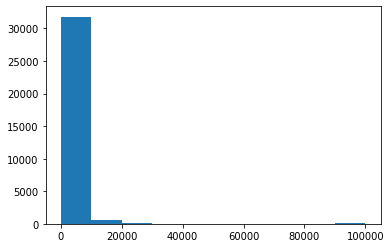

In [6]:
gain = plt.hist(income94.capital_gain)



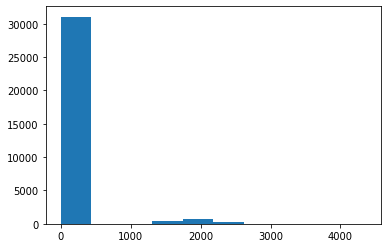

In [7]:
loss = plt.hist(income94.capital_loss)

Yes, thses variable should be transfer to categorical variables. Since the mojority of values for both variable are 0. In this case, categorical variables are easier to interpret than numerical variables.

In [8]:
income94["capital_gain"].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

In [9]:
income94["capital_loss"].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

In [10]:
income94['capital_gain_lost'] = income94['capital_gain'].apply(lambda x: 'gain' if x > 0 else 'none')
income94.loc[income94['capital_loss']>0, 'capital_gain_lost'] = 'loss'
income94['capital_gain_lost'].describe()

count     32561
unique        3
top        none
freq      28330
Name: capital_gain_lost, dtype: object

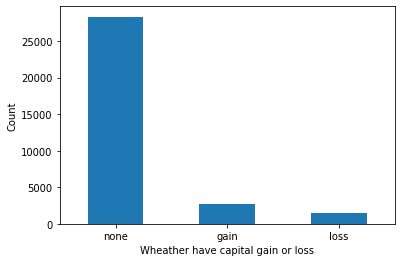

In [11]:
###plot a bar chart for the new variable
income94['capital_gain_lost'].value_counts().plot(kind='bar', xlabel='Wheather have capital gain or loss', ylabel='Count', rot=0)

###Q4 The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that sample represents based on location (and sometimes, other factors).  More information is provided in  this text file description of the data. Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses. 


count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

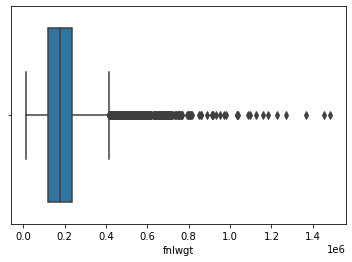

In [12]:
#plt.scatter(income94.fnlwgt)
sns.boxplot(x = 'fnlwgt', data = income94)
income94.fnlwgt.describe()

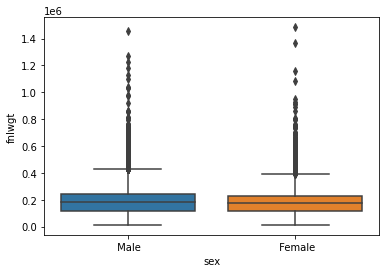

In [13]:
#compare by man/women
sns.boxplot(x="sex",y='fnlwgt', data = income94)

It is approximatelly symmetrica between 0-0.4 but has lots of outliers

In [14]:
def get_outliers(num_var, df):
  '''Get outliers based on the 1.5*IQR rule.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)

  # Generate IQR
  iqr = thirdquart - firstquart

  # Generate the boundary for an outlier (ie. the whiskers of the plot)
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr

  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  print('The variable {} has {} outliers'.format(num_var, len(outliers)))
  return outliers

outliers = get_outliers('fnlwgt', income94)
# Replace the outlier values with the median of that variable
income94['fnlwgt'].loc[outliers.index] = income94['fnlwgt'].median()

get_outliers('fnlwgt',income94)


The variable fnlwgt has 992 outliers
The variable fnlwgt has 459 outliers


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group,capital_gain_lost
89,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K,none
200,26,Private,397317,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,1876,40,United-States,<=50K,loss
251,42,Private,390781,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,<=50K,none
317,22,Private,399087,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico,<=50K,none
364,22,Private,410439,HS-grad,9,Married-spouse-absent,Sales,Not-in-family,White,Male,0,0,55,United-States,<=50K,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32250,43,Private,409922,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,50,United-States,>50K,loss
32375,59,Private,395736,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,>50K,none
32442,25,Private,390657,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K,none
32494,82,NaN,403910,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,3,United-States,<=50K,none


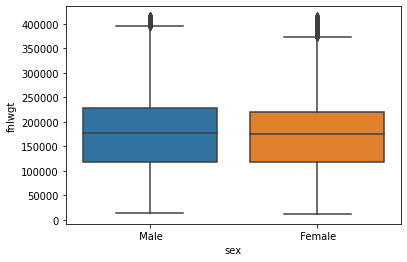

In [15]:
sns.boxplot(x="sex",y='fnlwgt', data = income94)

###Find the correlations between age, education_num, and hours_per_week. 
Do any of the variables appear to be correlated? How did you make your assessment?

Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?

How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?

Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?


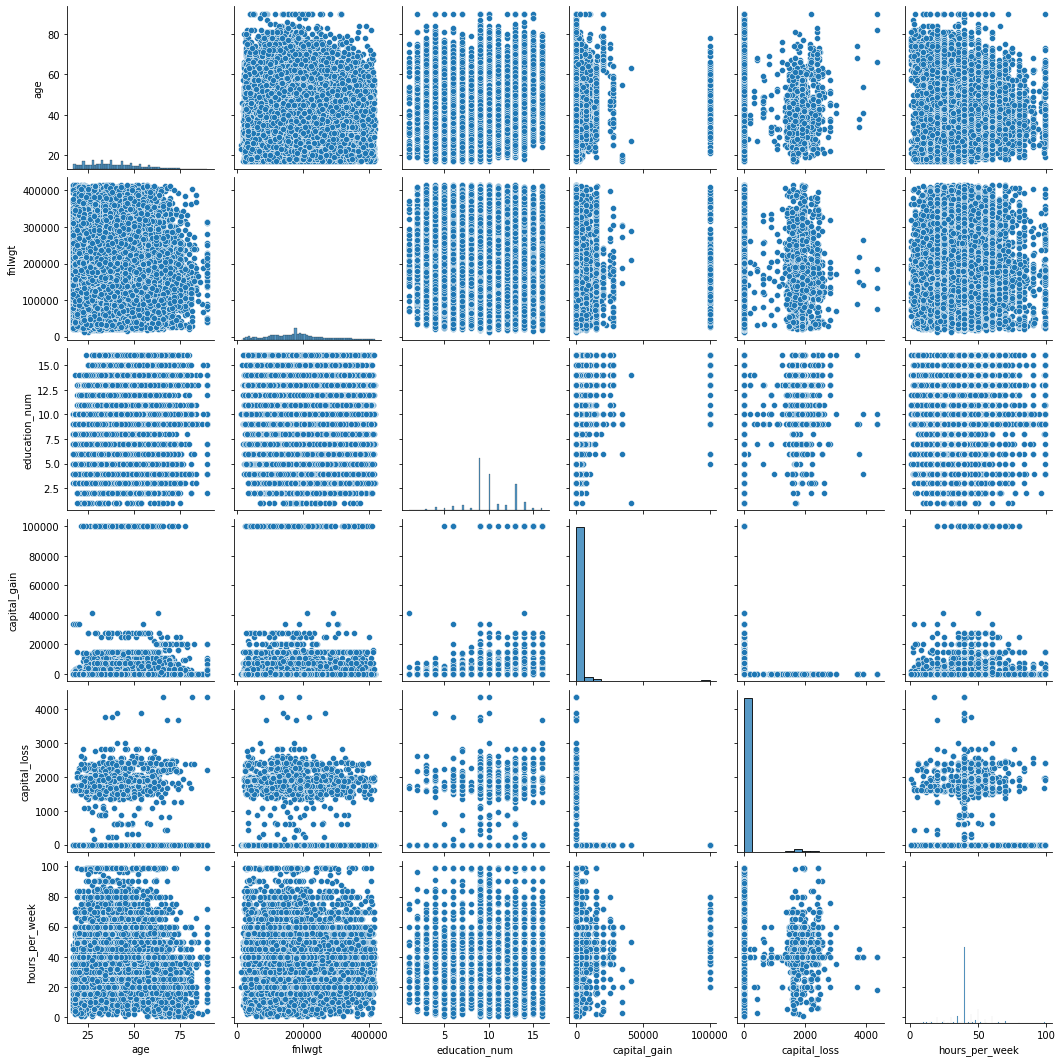

In [16]:
sns.pairplot(income94)

In [17]:
correlation_matrix = income94.corr()
print(correlation_matrix)

                     age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.064636       0.036527      0.077674      0.057775   
fnlwgt         -0.064636  1.000000      -0.034382      0.001729     -0.002380   
education_num   0.036527 -0.034382       1.000000      0.122630      0.079923   
capital_gain    0.077674  0.001729       0.122630      1.000000     -0.031615   
capital_loss    0.057775 -0.002380       0.079923     -0.031615      1.000000   
hours_per_week  0.068756 -0.015712       0.148123      0.078409      0.054256   

                hours_per_week  
age                   0.068756  
fnlwgt               -0.015712  
education_num         0.148123  
capital_gain          0.078409  
capital_loss          0.054256  
hours_per_week        1.000000  


In [18]:
male = income94[income94['sex']==' Male']
correlation1 = male['education_num'].corr(male['age'])
female = income94[income94['sex']==' Female']
correlation2 = female['education_num'].corr(female['age'])
print(correlation1)
print(correlation2)


0.06048640919826827
-0.017899243935447715


It seems that there is a weak positive correlation between education_num and age compare for male participents, while there is a weak negative correlation for female.

In [19]:
#covariance matrix
np.cov(income94['education_num'],income94['hours_per_week'])

array([[  6.61888991,   4.70533794],
       [  4.70533794, 152.45899505]])

variance of education_num is smaller than hours_per_week

###***Regression.***





###Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable.Do men tend to work more hours?

In [33]:
#Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable. Do men tend to work more hours?
x = income94[['hours_per_week', 'sex', 'education_num']]
x = pd.get_dummies(data=x, drop_first=True)

reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit()

print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:41:00   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   


Here we can see that Male is seen as a category reference in sex variable. So on average, female works 6.0177h per week more than male.

###Add education_num as a control variable, does the trend in hours worked by men vs women remain the same? Is the coefficient for education_num statistically significant? What is the 95% confidence interval?

In [35]:
reg2 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:05:15   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

Yes the coefficient of sex is still positive, only a little smaller than the original model. It means that on average, females work 5.97 hours more than male per week, holding education_num as a constant. The coefficient for education_num is statistically significant since p < 0.001.
The 95% confidence interval is [5.69, 6.245] for sex[T. Male] and is [0.647,0.748] fir educaiton_num.

###Now add gross_income_group as a binary variable in the model and compare this model with the models including (i) only sex and (ii) sex and education_num. Write down the interpretation for the coefficient for sex in each model. What statistic(s) can help to decide which model is the “best”? How do the three models compare?

In [36]:
reg3 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:40:54   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The Intercept reg3 is the highest while the coefficient of sex is the lowest. While the R-squaried value for the three model is r1<r2<r3.
In the first model, coefficient means that on average, female works 6.0177h  more per week than male. In the second model, it means that on average, female works 5.9709 hours more per week than male under same education_num. In the third model, it means that on average, females works 5.1010 hours more per week than males under same educaiton_num and gross_income_group.
The third model including sex and education_num might be better since it has the highest R square value and lowest AIC/BIC value which means it is better fit.

###PART III - Reporting on your own regression analysis

In [42]:
reg_1 = smf.ols('hours_per_week ~ gross_income_group', data = income94).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1813.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:54:49   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [45]:
reg_2 = smf.ols('hours_per_week ~ gross_income_group + age', data = income94).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     911.0
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:58:28   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32558   BIC:                         2.543e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [47]:
reg_3 = smf.ols('hours_per_week ~ gross_income_group + sex', data = income94).fit()
print(reg_3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1544.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:59:08   Log-Likelihood:            -1.2657e+05
No. Observations:               32561   AIC:                         2.531e+05
Df Residuals:                   32558   BIC:                         2.532e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [48]:
reg_4 = smf.ols('hours_per_week ~ gross_income_group + sex + age', data = income94).fit()
print(reg_4.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1030.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:59:27   Log-Likelihood:            -1.2657e+05
No. Observations:               32561   AIC:                         2.531e+05
Df Residuals:                   32557   BIC:                         2.532e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         